In [2]:
!pip install opendatasets
!pip install pandas

In [4]:
import opendatasets as od
import pandas as pd

In [79]:
od.download(
    "https://www.kaggle.com/datasets/lainguyn123/student-performance-factors")

Skipping, found downloaded files in "./student-performance-factors" (use force=True to force download)


In [8]:
import pandas as pd
df = pd.read_csv('StudentPerformanceFactors.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [12]:
df = df.dropna(axis=1)
print(df)

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                     

In [81]:
df = df.drop_duplicates()

In [110]:
print(df)

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                     

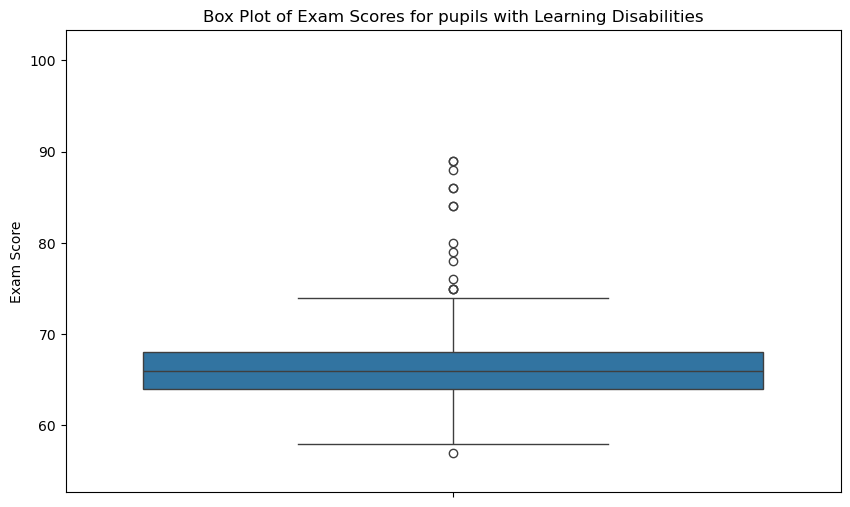

Statistical Summary for pupils with Learning Disabilities:
count    695.000000
mean      66.270504
std        4.068071
min       57.000000
25%       64.000000
50%       66.000000
75%       68.000000
max       89.000000
Name: Exam_Score, dtype: float64


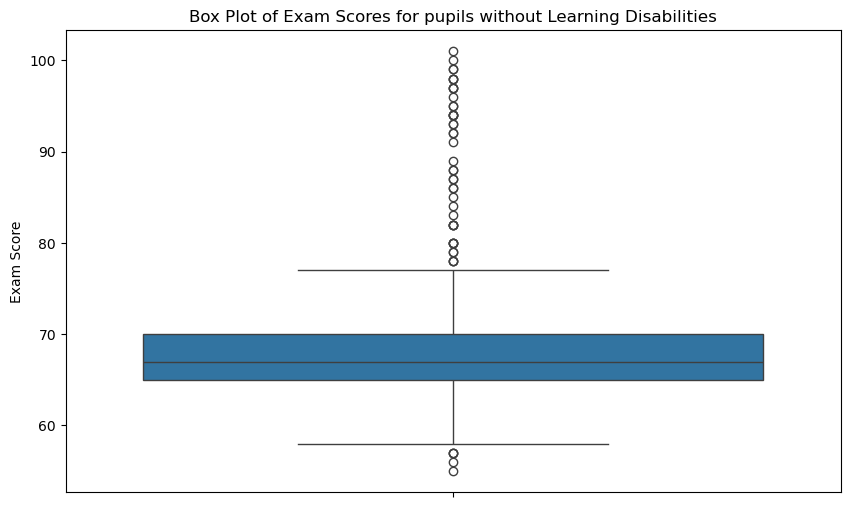


Statistical Summary for pupils without Learning Disabilities:
count    5912.000000
mean       67.349120
std         3.853549
min        55.000000
25%        65.000000
50%        67.000000
75%        70.000000
max       101.000000
Name: Exam_Score, dtype: float64
Independent t-test Results:
t-statistic: -6.65
p-value: 0.0000
The difference in exam scores is statistically significant (p < 0.05).


In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

LD_T = df[df['Learning_Disabilities'] == 'Yes']

LD_F = df[df['Learning_Disabilities'] == 'No']

#Creating padding to make sure all the plots fit into the chart
min_score = min(LD_T['Exam_Score'].min(), LD_F['Exam_Score'].min())
max_score = max(LD_T['Exam_Score'].max(), LD_F['Exam_Score'].max())
padding = 0.05 * (max_score - min_score)

plt.figure(figsize=(10, 6))
sns.boxplot(y=LD_T['Exam_Score'])
plt.title("Box Plot of Exam Scores for pupils with Learning Disabilities")
plt.ylabel("Exam Score")
plt.ylim(min_score - padding, max_score + padding)
plt.show()

print("Statistical Summary for pupils with Learning Disabilities:")
print(LD_T['Exam_Score'].describe())


plt.figure(figsize=(10, 6))
sns.boxplot(y=LD_F['Exam_Score'])
plt.title("Box Plot of Exam Scores for pupils without Learning Disabilities")
plt.ylabel("Exam Score")
plt.ylim(min_score - padding, max_score + padding)
plt.show()

print("\nStatistical Summary for pupils without Learning Disabilities:")
print(LD_F['Exam_Score'].describe())


# Independent t-test
t_stat, p_value = ttest_ind(LD_T['Exam_Score'], LD_F['Exam_Score'], equal_var=False)

print("Independent t-test Results:")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("The difference in exam scores is statistically significant (p < 0.05).")
else:
    print("The difference in exam scores is not statistically significant (p >= 0.05).")

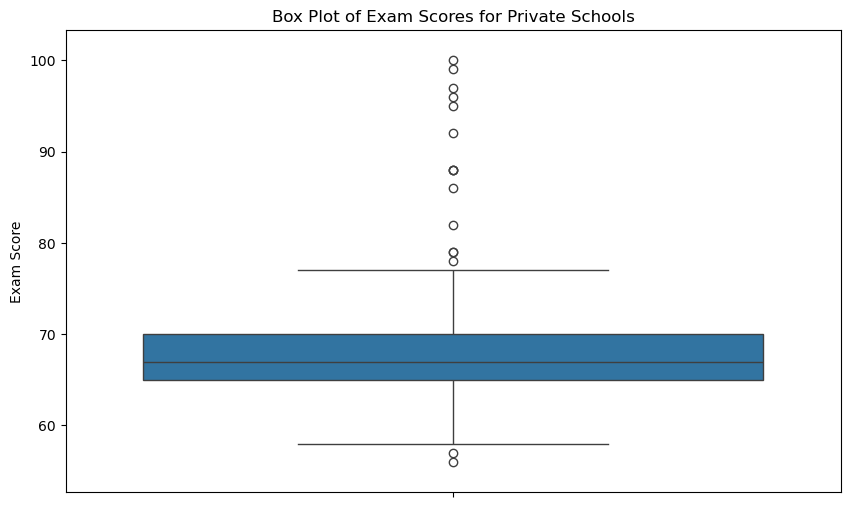

Statistical Summary for Private Schools Exams Scores:
count    2009.000000
mean       67.287705
std         3.848844
min        56.000000
25%        65.000000
50%        67.000000
75%        70.000000
max       100.000000
Name: Exam_Score, dtype: float64


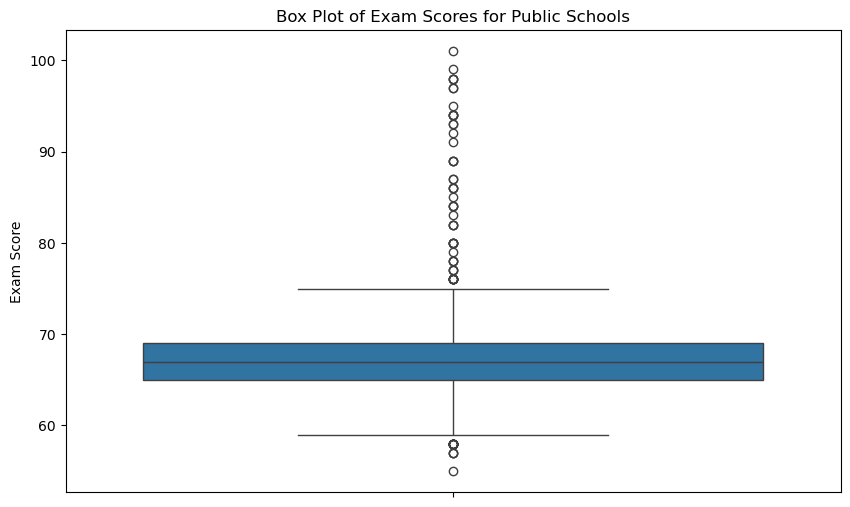

Statistical Summary for Public Schools Exams Scores:
count    4598.000000
mean       67.212919
std         3.908697
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64
Independent t-test Results:
t-statistic: 0.72
p-value: 0.4697
The difference in exam scores is not statistically significant (p >= 0.05).


In [85]:
import seaborn as sns

Priv_school = df[df['School_Type'] == 'Private']

Pub_school = df[df['School_Type'] == 'Public']

min_score = min(Priv_school['Exam_Score'].min(), Pub_school['Exam_Score'].min())
max_score = max(Priv_school['Exam_Score'].max(), Pub_school['Exam_Score'].max())
padding = 0.05 * (max_score - min_score)

#Private school Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=Priv_school['Exam_Score'])
plt.title("Box Plot of Exam Scores for Private Schools")
plt.ylabel("Exam Score")
plt.ylim(min_score - padding, max_score + padding)
plt.show()

print("Statistical Summary for Private Schools Exams Scores:")
print(Priv_school['Exam_Score'].describe())

#Public school Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=Pub_school['Exam_Score'])
plt.title("Box Plot of Exam Scores for Public Schools")
plt.ylabel("Exam Score")
plt.ylim(min_score - padding, max_score + padding)
plt.show()

print("Statistical Summary for Public Schools Exams Scores:")
print(Pub_school['Exam_Score'].describe())

# Independent t-test
t_stat, p_value = ttest_ind(Priv_school['Exam_Score'], Pub_school['Exam_Score'], equal_var=False)

print("Independent t-test Results:")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("The difference in exam scores is statistically significant (p < 0.05).")
else:
    print("The difference in exam scores is not statistically significant (p >= 0.05).")

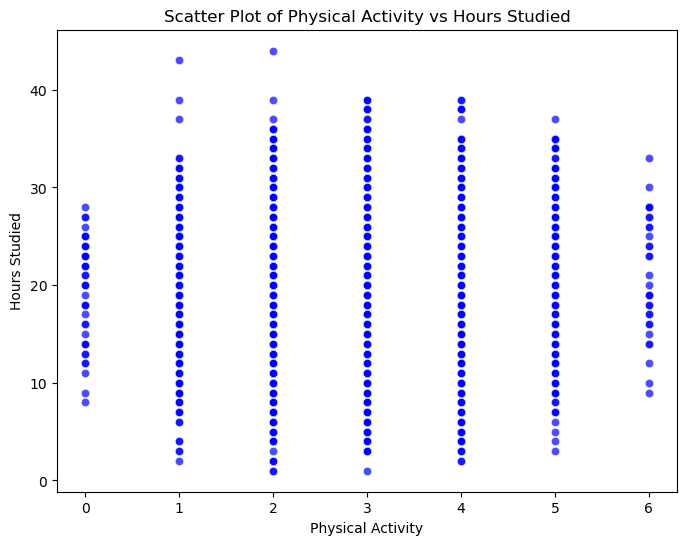


Statistical Summary of Hours Studied based on Physical Activity:
                    count       mean       std  min    25%   50%    75%   max
Physical_Activity                                                            
0                    46.0  19.782609  5.137717  8.0  16.00  21.5  23.00  28.0
1                   421.0  20.190024  6.027871  2.0  16.00  21.0  24.00  43.0
2                  1627.0  20.011063  6.101227  1.0  16.00  20.0  24.00  44.0
3                  2545.0  19.825540  5.912841  1.0  16.00  20.0  24.00  39.0
4                  1575.0  20.049524  5.947576  2.0  16.00  20.0  24.00  39.0
5                   361.0  20.224377  6.268711  3.0  16.00  20.0  25.00  37.0
6                    32.0  21.062500  6.164087  9.0  16.75  20.5  26.25  33.0

Correlation between Attendance and Exam Scores: 0.00


In [87]:
import seaborn as sns

# Physical activity and hours studied
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Physical_Activity'], y=df['Hours_Studied'], color='blue', alpha=0.7)
plt.title("Scatter Plot of Physical Activity vs Hours Studied")
plt.xlabel("Physical Activity")
plt.ylabel("Hours Studied")
plt.show()

print("\nStatistical Summary of Hours Studied based on Physical Activity:")
print(df.groupby('Physical_Activity')['Hours_Studied'].describe())

correlation = df['Physical_Activity'].corr(df['Hours_Studied'])
print(f"\nCorrelation between Attendance and Exam Scores: {correlation:.2f}")

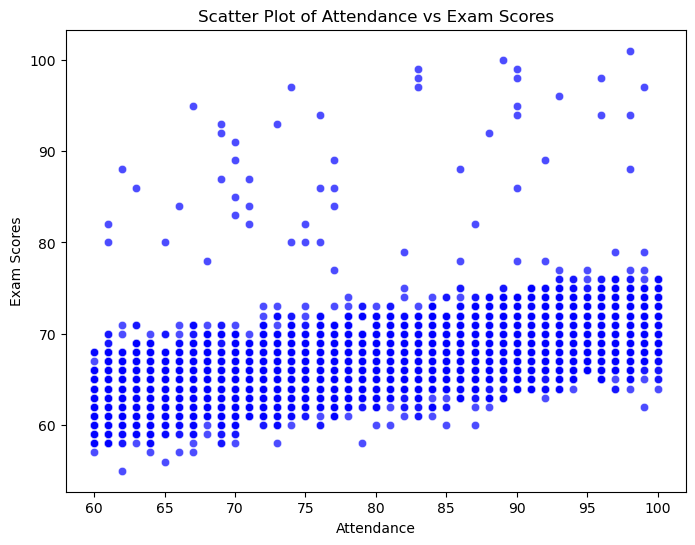


Correlation between Attendance and Exam Scores: 0.58
Regression Line Equation: Exam_Score = 0.20 * Attendance + 51.58
R-squared value: 0.34
P-value: 0.000
Standard Error: 0.003


In [112]:
from scipy.stats import linregress

# Attendanve vs Exam Scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Attendance'], y=df['Exam_Score'], color='blue', alpha=0.7)
plt.title("Scatter Plot of Attendance vs Exam Scores")
plt.xlabel("Attendance")
plt.ylabel("Exam Scores")
plt.show()

# Correlation coefficient
correlation = df['Attendance'].corr(df['Exam_Score'])
print(f"\nCorrelation between Attendance and Exam Scores: {correlation:.2f}")

# Linear regression analysis
slope, intercept, r_value, p_value, std_err = linregress(df['Attendance'], df['Exam_Score'])

print(f"Regression Line Equation: Exam_Score = {slope:.2f} * Attendance + {intercept:.2f}")
print(f"R-squared value: {r_value**2:.2f}")
print(f"P-value: {p_value:.3f}")
print(f"Standard Error: {std_err:.3f}")

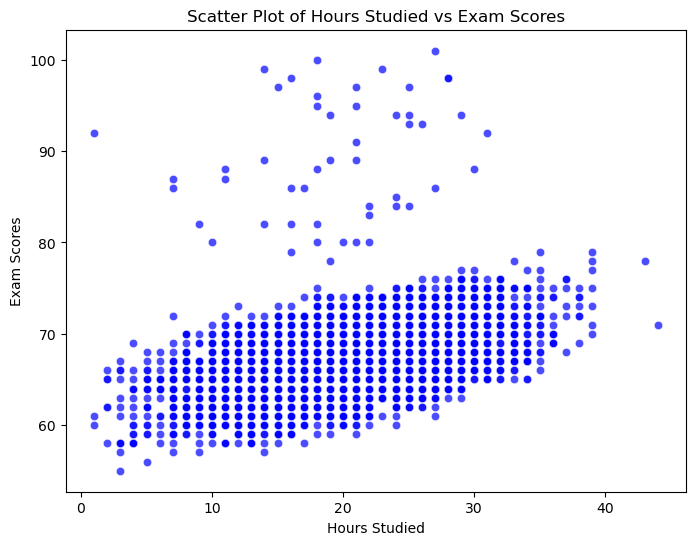


Correlation between Hours Studied and Exam Scores: 0.45
Regression Line Equation: Exam_Score = 0.29 * Hours_Studied + 61.46
R-squared value: 0.20
P-value: 0.000
Standard Error: 0.007


In [126]:
# Hours studied and exam scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Hours_Studied'], y=df['Exam_Score'], color='blue', alpha=0.7)
plt.title("Scatter Plot of Hours Studied vs Exam Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Scores")
plt.show()

correlation = df['Hours_Studied'].corr(df['Exam_Score'])
print(f"\nCorrelation between Hours Studied and Exam Scores: {correlation:.2f}")

# Linear regression analysis
slope, intercept, r_value, p_value, std_err = linregress(df['Hours_Studied'], df['Exam_Score'])

print(f"Regression Line Equation: Exam_Score = {slope:.2f} * Hours_Studied + {intercept:.2f}")
print(f"R-squared value: {r_value**2:.2f}")
print(f"P-value: {p_value:.3f}")
print(f"Standard Error: {std_err:.3f}")

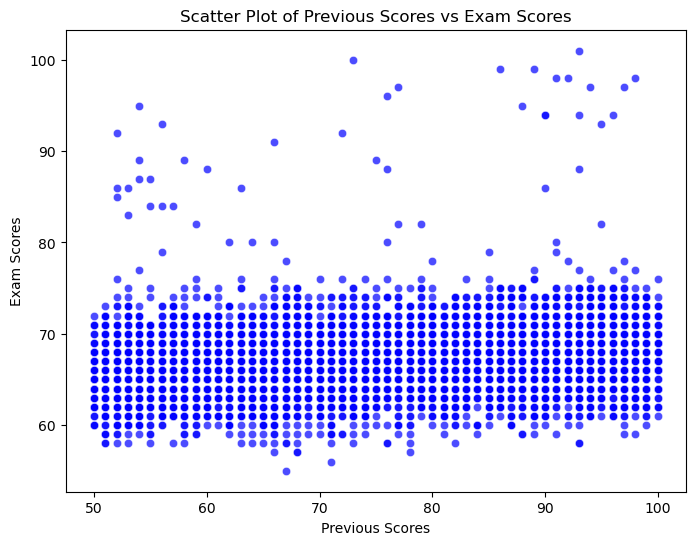


Correlation between Previous Scores and Exam Scores: 0.18


In [93]:
# Previous exam scores and exam scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Previous_Scores'], y=df['Exam_Score'], color='blue', alpha=0.7)
plt.title("Scatter Plot of Previous Scores vs Exam Scores")
plt.xlabel("Previous Scores")
plt.ylabel("Exam Scores")
plt.show()

correlation = df['Previous_Scores'].corr(df['Exam_Score'])
print(f"\nCorrelation between Previous Scores and Exam Scores: {correlation:.2f}")

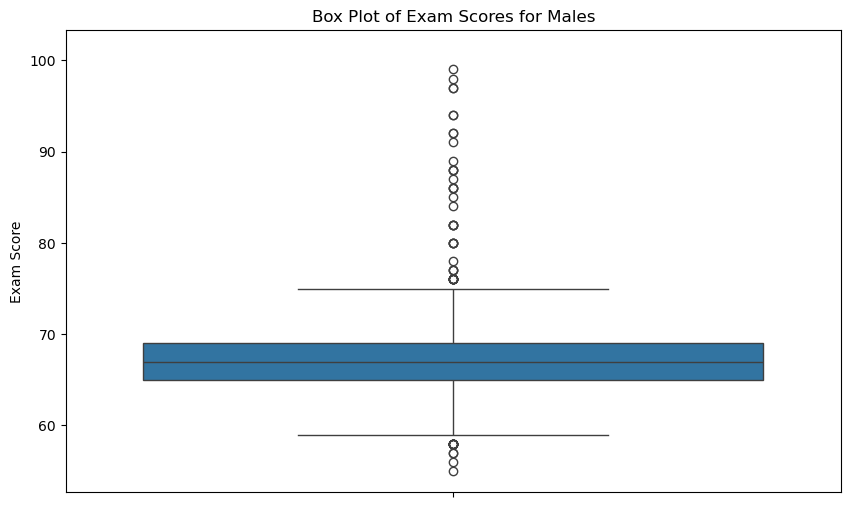

Statistical Summary for Male Exams Scores:
count    3814.000000
mean       67.228894
std         3.766360
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max        99.000000
Name: Exam_Score, dtype: float64


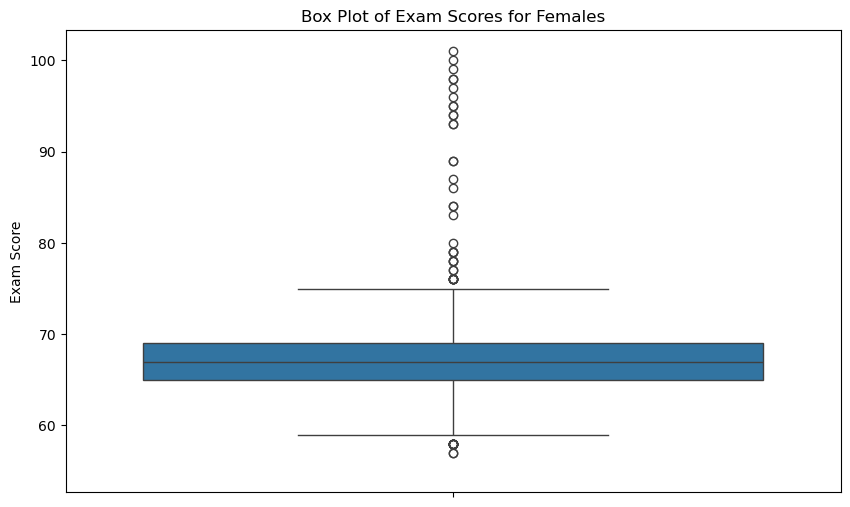

Statistical Summary for Female Exams Scores:
count    2793.000000
mean       67.244898
std         4.054451
min        57.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64
Independent t-test Results:
t-statistic: -0.16
p-value: 0.8703
The difference in exam scores is not statistically significant (p >= 0.05).


In [114]:
Male = df[df['Gender'] == 'Male']

Female = df[df['Gender'] == 'Female']

min_score = min(Male['Exam_Score'].min(), Female['Exam_Score'].min())
max_score = max(Male['Exam_Score'].max(), Female['Exam_Score'].max())
padding = 0.05 * (max_score - min_score)

#Males
plt.figure(figsize=(10, 6))
sns.boxplot(y=Male['Exam_Score'])
plt.title("Box Plot of Exam Scores for Males")
plt.ylabel("Exam Score")
plt.ylim(min_score - padding, max_score + padding)
plt.show()

print("Statistical Summary for Male Exams Scores:")
print(Male['Exam_Score'].describe())

#Females
plt.figure(figsize=(10, 6))
sns.boxplot(y=Female['Exam_Score'])
plt.title("Box Plot of Exam Scores for Females")
plt.ylabel("Exam Score")
plt.ylim(min_score - padding, max_score + padding)
plt.show()

print("Statistical Summary for Female Exams Scores:")
print(Female['Exam_Score'].describe())

# Independent t-test
t_stat, p_value = ttest_ind(Male['Exam_Score'], Female['Exam_Score'], equal_var=False)

print("Independent t-test Results:")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("The difference in exam scores is statistically significant (p < 0.05).")
else:
    print("The difference in exam scores is not statistically significant (p >= 0.05).")

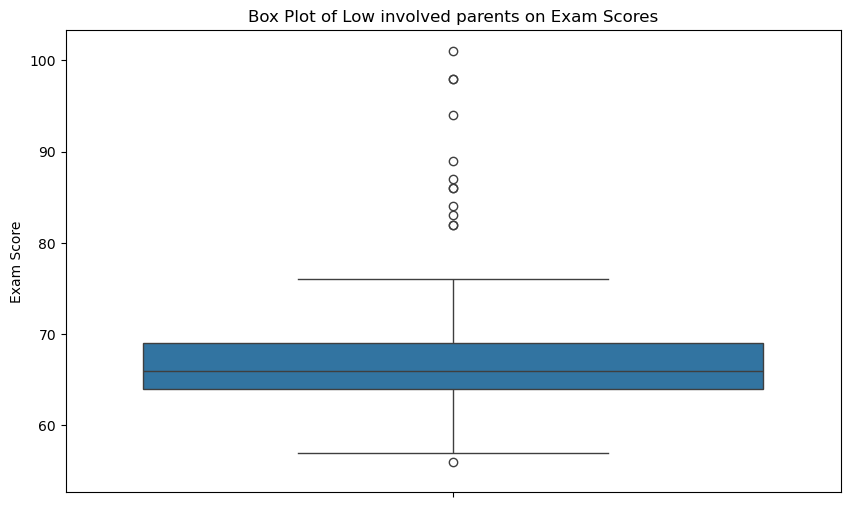

Statistical Summary for Low involved parents on Exam Scores:
count    1337.000000
mean       66.358265
std         3.971398
min        56.000000
25%        64.000000
50%        66.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64


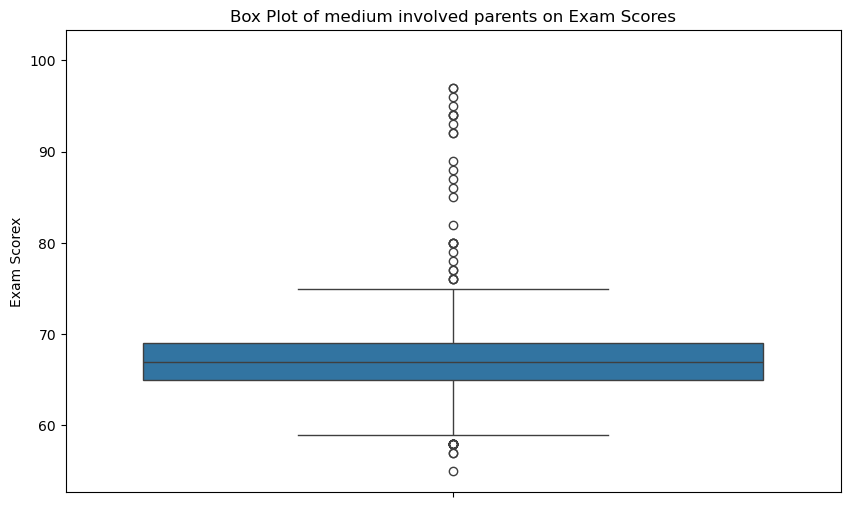

Statistical Summary for Medium involved parents on Exam Scores:
count    3362.000000
mean       67.098156
std         3.727620
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max        97.000000
Name: Exam_Score, dtype: float64


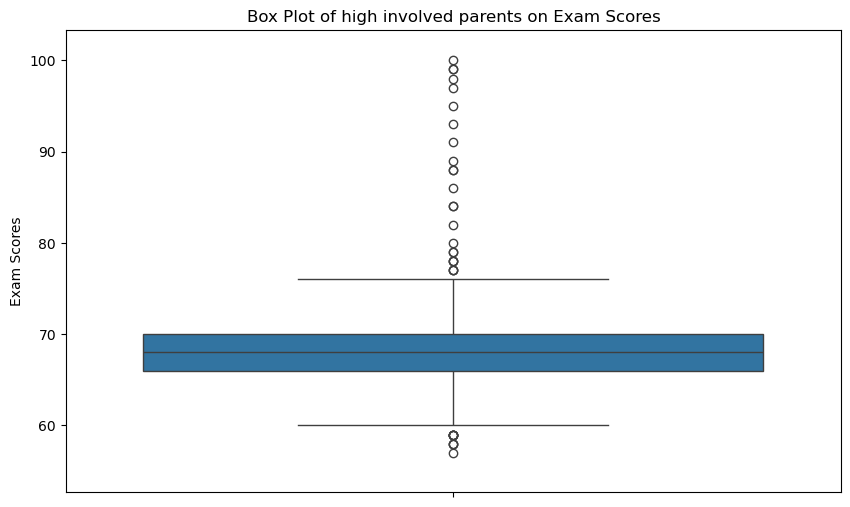

Statistical Summary for High involved parents on Exam Scores:
count    1908.000000
mean       68.092767
std         3.947650
min        57.000000
25%        66.000000
50%        68.000000
75%        70.000000
max       100.000000
Name: Exam_Score, dtype: float64
Shapiro-Wilk Test for Normality:
Low Involvement: ShapiroResult(statistic=0.8755616020866324, pvalue=2.2241280431776807e-31)
Medium Involvement: ShapiroResult(statistic=0.9181284100071027, pvalue=2.3744340661514574e-39)
High Involvement: ShapiroResult(statistic=0.8839438324868071, pvalue=1.3611295179457145e-35)

Levene's Test for Homogeneity of Variances:
Statistic: 0.42, p-value: 0.6579

One-Way ANOVA Results:
Statistic: 84.49, p-value: 0.0000

Post-Hoc Analysis (Tukey HSD):
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  High    Low  -1.7345   0.0 -2.0557 -1.4133   True
  High Medium  -0.9946   0.0 -1.2528 -0.7364   T

In [118]:
from scipy.stats import f_oneway, shapiro, levene
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Low_involve = df[df['Parental_Involvement'] == 'Low']

Med_involve = df[df['Parental_Involvement'] == 'Medium']

High_involve = df[df['Parental_Involvement'] == 'High']

min_score = df['Exam_Score'].min()
max_score = df['Exam_Score'].max()
padding = 0.05 * (max_score - min_score)

#Low Involvement
plt.figure(figsize=(10, 6))
sns.boxplot(y=Low_involve['Exam_Score'])
plt.title("Box Plot of Low involved parents on Exam Scores")
plt.ylabel("Exam Score")
plt.ylim(min_score - padding, max_score + padding)
plt.show()

print("Statistical Summary for Low involved parents on Exam Scores:")
print(Low_involve['Exam_Score'].describe())

#Medium involved
plt.figure(figsize=(10, 6))
sns.boxplot(y=Med_involve['Exam_Score'])
plt.title("Box Plot of medium involved parents on Exam Scores")
plt.ylabel("Exam Scorex")
plt.ylim(min_score - padding, max_score + padding)
plt.show()

print("Statistical Summary for Medium involved parents on Exam Scores:")
print(Med_involve['Exam_Score'].describe())

#High involved
plt.figure(figsize=(10, 6))
sns.boxplot(y=High_involve['Exam_Score'])
plt.title("Box Plot of high involved parents on Exam Scores")
plt.ylabel("Exam Scores")
plt.ylim(min_score - padding, max_score + padding)
plt.show()

print("Statistical Summary for High involved parents on Exam Scores:")
print(High_involve['Exam_Score'].describe())


#Statistical Analysis
# Shapiro-Wilk test for normality
print("Shapiro-Wilk Test for Normality:")
print("Low Involvement:", shapiro(Low_involve['Exam_Score']))
print("Medium Involvement:", shapiro(Med_involve['Exam_Score']))
print("High Involvement:", shapiro(High_involve['Exam_Score']))

# Levene's test for homogeneity of variances
levene_stat, levene_p = levene(
    Low_involve['Exam_Score'],
    Med_involve['Exam_Score'],
    High_involve['Exam_Score']
)
print("\nLevene's Test for Homogeneity of Variances:")
print(f"Statistic: {levene_stat:.2f}, p-value: {levene_p:.4f}")

# One-Way ANOVA
anova_stat, anova_p = f_oneway(
    Low_involve['Exam_Score'],
    Med_involve['Exam_Score'],
    High_involve['Exam_Score']
)
print("\nOne-Way ANOVA Results:")
print(f"Statistic: {anova_stat:.2f}, p-value: {anova_p:.4f}")

# Post-hoc analysis
if anova_p < 0.05:
    data = df[['Parental_Involvement', 'Exam_Score']]
    tukey = pairwise_tukeyhsd(data['Exam_Score'], data['Parental_Involvement'])
    print("\nPost-Hoc Analysis (Tukey HSD):")
    print(tukey)
else:
    print("\nNo significant differences found between differences in involvement.")

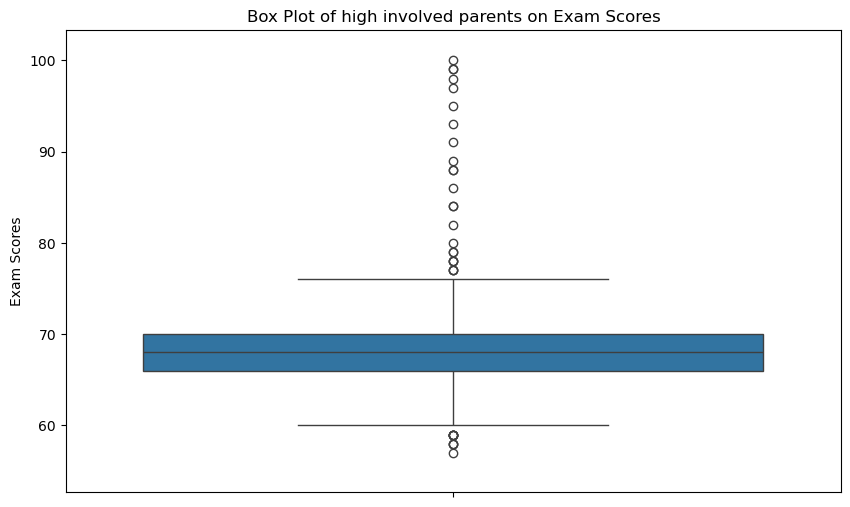

Statistical Summary for High involved parents on Exam Scores:
count    1908.000000
mean       68.092767
std         3.947650
min        57.000000
25%        66.000000
50%        68.000000
75%        70.000000
max       100.000000
Name: Exam_Score, dtype: float64


In [124]:
#High involved
plt.figure(figsize=(10, 6))
sns.boxplot(y=High_involve['Exam_Score'])
plt.title("Box Plot of high involved parents on Exam Scores")
plt.ylabel("Exam Scores")
plt.ylim(min_score - padding, max_score + padding)
plt.show()

print("Statistical Summary for High involved parents on Exam Scores:")
print(High_involve['Exam_Score'].describe())

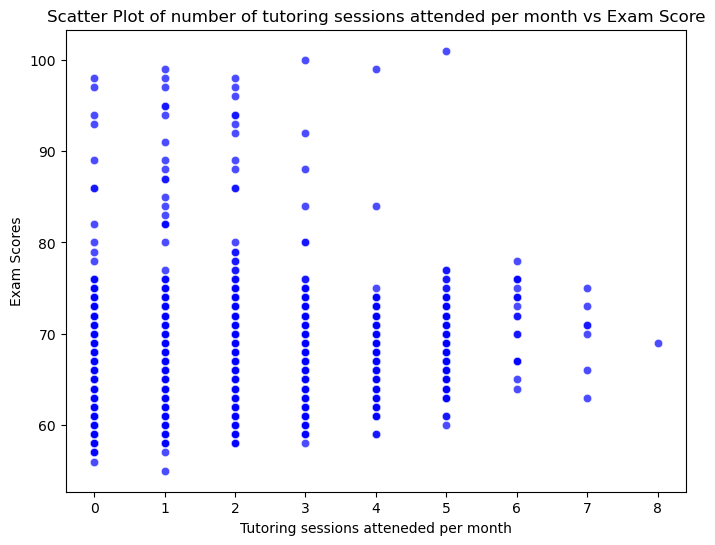


Correlation between Tutoring Sessions attended per month and Exam Scores: 0.16
Regression Line Equation: Exam_Score = 0.49 * Attendance + 66.50
R-squared value: 0.02
P-value: 0.000
Standard Error: 0.038


In [98]:
# Tutoring sessions attended per month and exam scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Tutoring_Sessions'], y=df['Exam_Score'], color='blue', alpha=0.7)
plt.title("Scatter Plot of number of tutoring sessions attended per month vs Exam Score")
plt.xlabel("Tutoring sessions atteneded per month")
plt.ylabel("Exam Scores")
plt.show()

correlation = df['Tutoring_Sessions'].corr(df['Exam_Score'])
print(f"\nCorrelation between Tutoring Sessions attended per month and Exam Scores: {correlation:.2f}")

# Linear regression analysis
slope, intercept, r_value, p_value, std_err = linregress(df['Tutoring_Sessions'], df['Exam_Score'])

print(f"Regression Line Equation: Exam_Score = {slope:.2f} * Attendance + {intercept:.2f}")
print(f"R-squared value: {r_value**2:.2f}")
print(f"P-value: {p_value:.3f}")
print(f"Standard Error: {std_err:.3f}")

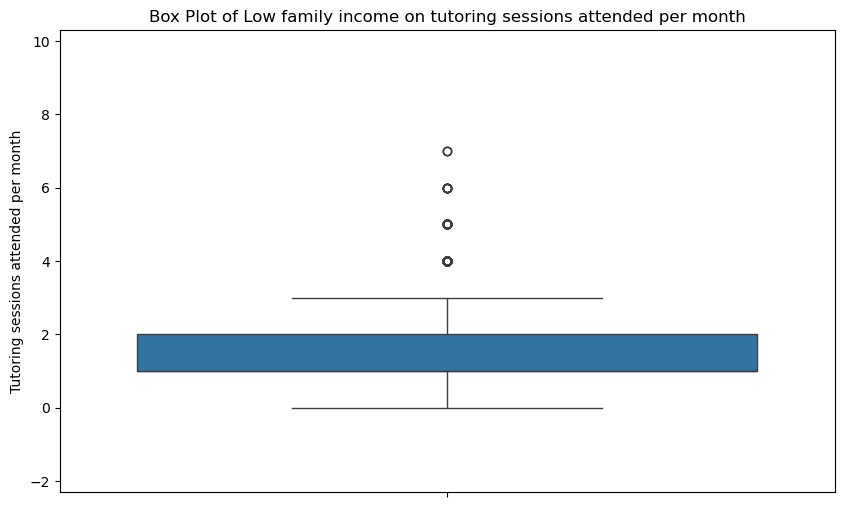

Statistical Summary for Low family income on tutoring sessions attended per month:
count    2672.000000
mean        1.487650
std         1.226134
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: Tutoring_Sessions, dtype: float64


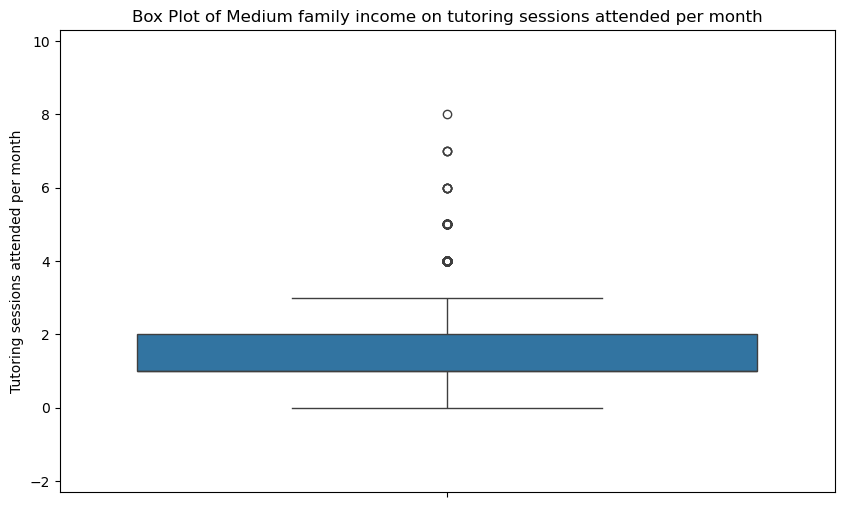

Statistical Summary for Medium family income on tutoring sessions attended per month:
count    2666.000000
mean        1.494374
std         1.227639
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: Tutoring_Sessions, dtype: float64


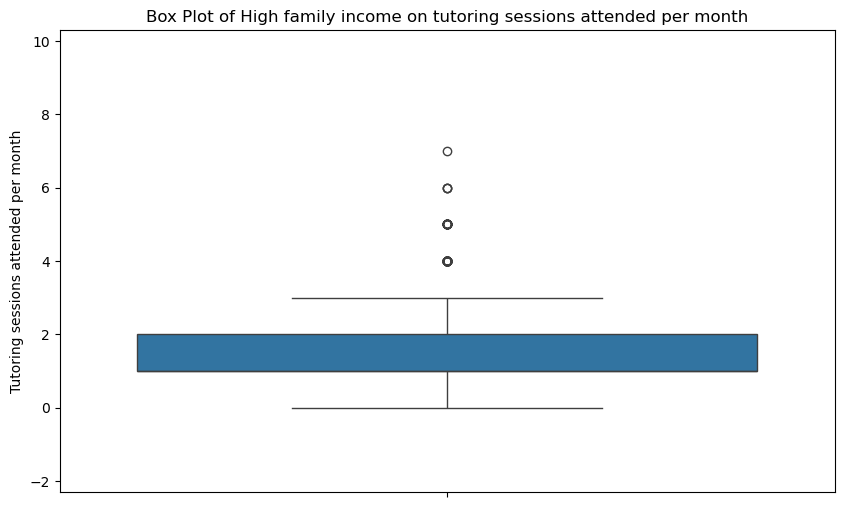

Statistical Summary for High family income on tutoring sessions attended per month:
count    1269.000000
mean        1.505122
std         1.246831
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: Tutoring_Sessions, dtype: float64


In [99]:
Low_inc = df[df['Family_Income'] == 'Low']

Med_inc = df[df['Family_Income'] == 'Medium']

High_inc = df[df['Family_Income'] == 'High']

min_hours = df['Tutoring_Sessions'].min()
max_hours = df['Tutoring_Sessions'].max()
padding = 0.05 * (max_score - min_score)

#Low Involvement
plt.figure(figsize=(10, 6))
sns.boxplot(y=Low_inc['Tutoring_Sessions'])
plt.title("Box Plot of Low family income on tutoring sessions attended per month")
plt.ylabel("Tutoring sessions attended per month")
plt.ylim(min_hours - padding, max_hours + padding)
plt.show()

print("Statistical Summary for Low family income on tutoring sessions attended per month:")
print(Low_inc['Tutoring_Sessions'].describe())

#Medium involved
plt.figure(figsize=(10, 6))
sns.boxplot(y=Med_inc['Tutoring_Sessions'])
plt.title("Box Plot of Medium family income on tutoring sessions attended per month")
plt.ylabel("Tutoring sessions attended per month")
plt.ylim(min_hours - padding, max_hours + padding)
plt.show()

print("Statistical Summary for Medium family income on tutoring sessions attended per month:")
print(Med_inc['Tutoring_Sessions'].describe())

#High involved
plt.figure(figsize=(10, 6))
sns.boxplot(y=High_inc['Tutoring_Sessions'])
plt.title("Box Plot of High family income on tutoring sessions attended per month")
plt.ylabel("Tutoring sessions attended per month")
plt.ylim(min_hours - padding, max_hours + padding)
plt.show()

print("Statistical Summary for High family income on tutoring sessions attended per month:")
print(High_inc['Tutoring_Sessions'].describe())

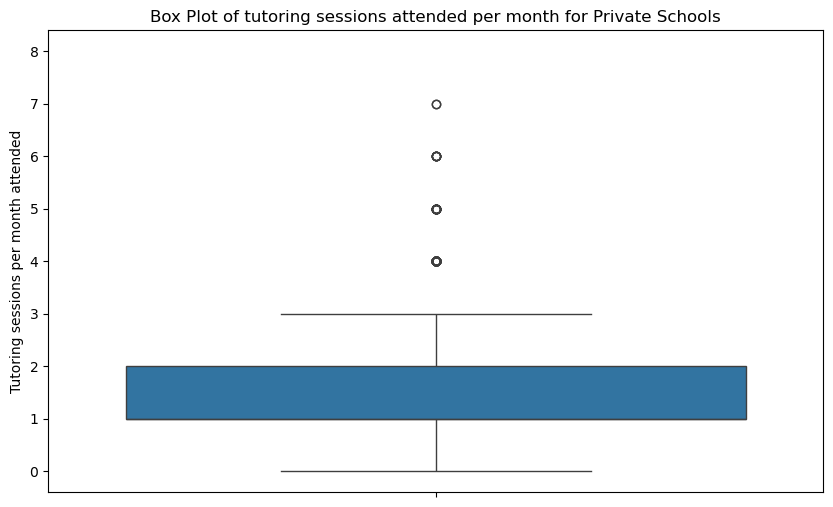

Statistical Summary for Private school students on tutoring sessions attended per month:
count    2009.000000
mean        1.478347
std         1.233922
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: Tutoring_Sessions, dtype: float64


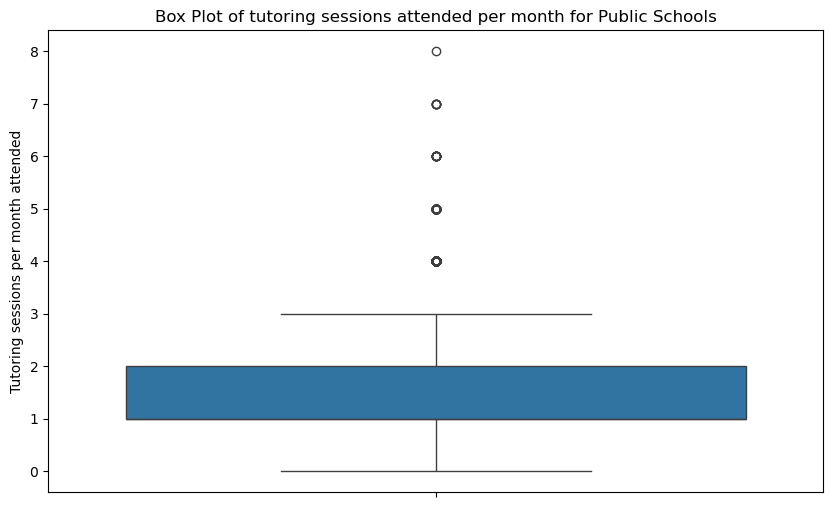

Statistical Summary for Public school students on tutoring sessions attended per month:
count    4598.000000
mean        1.500435
std         1.229177
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: Tutoring_Sessions, dtype: float64


In [101]:
Priv_school = df[df['School_Type'] == 'Private']

Pub_school = df[df['School_Type'] == 'Public']

min_score = min(Priv_school['Tutoring_Sessions'].min(), Pub_school['Tutoring_Sessions'].min())
max_score = max(Priv_school['Tutoring_Sessions'].max(), Pub_school['Tutoring_Sessions'].max())
padding = 0.05 * (max_score - min_score)

#Private school
plt.figure(figsize=(10, 6))
sns.boxplot(y=Priv_school['Tutoring_Sessions'])
plt.title("Box Plot of tutoring sessions attended per month for Private Schools")
plt.ylabel("Tutoring sessions per month attended")
plt.ylim(min_score - padding, max_score + padding)
plt.show()

print("Statistical Summary for Private school students on tutoring sessions attended per month:")
print(Priv_school['Tutoring_Sessions'].describe())

#Public school
plt.figure(figsize=(10, 6))
sns.boxplot(y=Pub_school['Tutoring_Sessions'])
plt.title("Box Plot of tutoring sessions attended per month for Public Schools")
plt.ylabel("Tutoring sessions per month attended")
plt.ylim(min_score - padding, max_score + padding)
plt.show()

print("Statistical Summary for Public school students on tutoring sessions attended per month:")
print(Pub_school['Tutoring_Sessions'].describe())

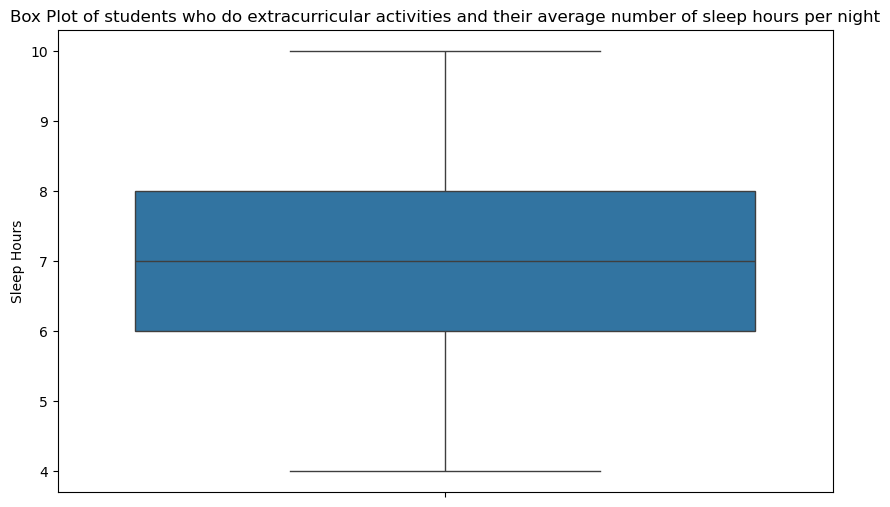

Statistical Summary for Extracurricular activities on average number of sleep hours per night:
count    3938.000000
mean        7.030726
std         1.473436
min         4.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: Sleep_Hours, dtype: float64


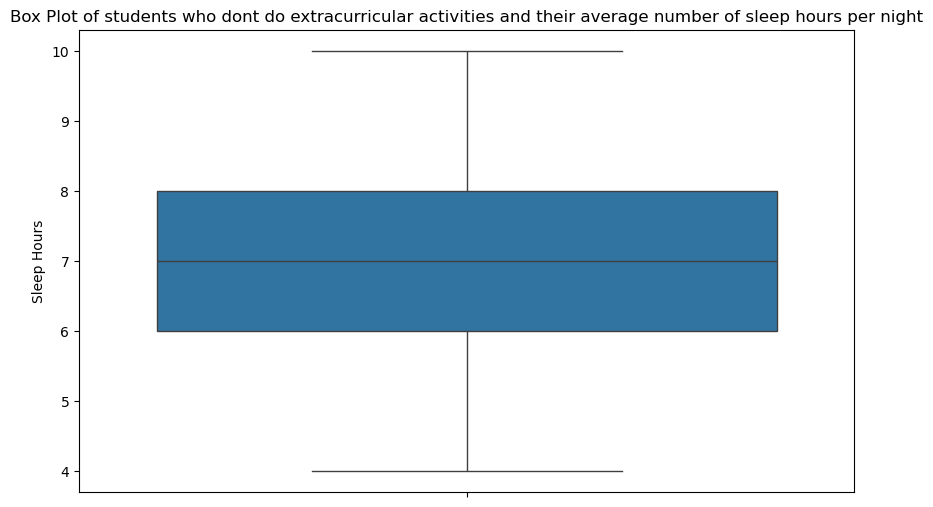

Statistical Summary for Extracurricular activities on average number of sleep hours per night:
count    2669.000000
mean        7.026602
std         1.460514
min         4.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: Sleep_Hours, dtype: float64


In [105]:
yes_extr = df[df['Extracurricular_Activities'] == 'Yes']

no_extr = df[df['Extracurricular_Activities'] == 'No']

min_score = min(yes_extr['Sleep_Hours'].min(), no_extr['Sleep_Hours'].min())
max_score = max(yes_extr['Sleep_Hours'].max(), no_extr['Sleep_Hours'].max())
padding = 0.05 * (max_score - min_score)

#yes extracurricular activities
plt.figure(figsize=(10, 6))
sns.boxplot(y=yes_extr['Sleep_Hours'])
plt.title("Box Plot of students who do extracurricular activities and their average number of sleep hours per night")
plt.ylabel("Sleep Hours")
plt.ylim(min_score - padding, max_score + padding)
plt.show()

print("Statistical Summary for Extracurricular activities on average number of sleep hours per night:")
print(yes_extr['Sleep_Hours'].describe())

#no extracurricular activities
plt.figure(figsize=(10, 6))
sns.boxplot(y=Pub_school['Sleep_Hours'])
plt.title("Box Plot of students who dont do extracurricular activities and their average number of sleep hours per night")
plt.ylabel("Sleep Hours")
plt.ylim(min_score - padding, max_score + padding)
plt.show()

print("Statistical Summary for Extracurricular activities on average number of sleep hours per night:")
print(no_extr['Sleep_Hours'].describe())

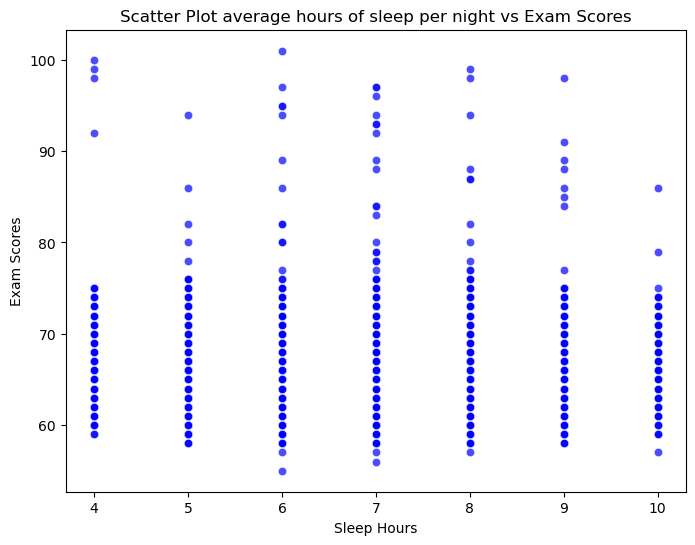


Statistical Summary of Exam Scores based on Sleep Hours:
              count       mean       std   min   25%   50%   75%    max
Sleep_Hours                                                            
4             309.0  67.627832  4.777586  59.0  65.0  67.0  69.0  100.0
5             695.0  67.297842  3.680963  58.0  65.0  67.0  69.5   94.0
6            1376.0  67.194767  3.924358  55.0  65.0  67.0  69.0  101.0
7            1741.0  67.242964  3.952318  56.0  65.0  67.0  69.0   97.0
8            1399.0  67.218728  3.691527  57.0  65.0  67.0  69.0   99.0
9             775.0  67.149677  3.967021  58.0  65.0  67.0  69.0   98.0
10            312.0  67.137821  3.542609  57.0  65.0  67.0  70.0   86.0


In [116]:
#Average hours of sleep vs exam scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Sleep_Hours'], y=df['Exam_Score'], color='blue', alpha=0.7)
plt.title("Scatter Plot average hours of sleep per night vs Exam Scores")
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Scores")
plt.show()

print("\nStatistical Summary of Exam Scores based on Sleep Hours:")
print(df.groupby('Sleep_Hours')['Exam_Score'].describe())